# Model1 : 구독 이탈 예측

## 라이브러리

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/colab/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/colab/data/test.csv')

In [109]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [110]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


## Column 설명
- user_id	: 사용자의 고유 식별자
- subscription_duration	: 사용자가 서비스에 가입한 기간 (월)
- recent_login_time	: 사용자가 마지막으로 로그인한 시간 (일)
- average_login_time	: 사용자의 일반적인 로그인 시간
- average_time_per_learning_session	: 각 학습 세션에 소요된 평균 시간 (분)
- monthly_active_learning_days	: 월간 활동적인 학습 일수
- total_completed_courses	: 완료한 총 코스 수
- recent_learning_achievement	: 최근 학습 성취도
- abandoned_learning_sessions	: 중단된 학습 세션 수
- community_engagement_level	: 커뮤니티 참여도
- preferred_difficulty_level	: 선호하는 난이도
- subscription_type	: 구독 유형
- customer_inquiry_history	: 고객 문의 이력
- payment_pattern	: 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
 - 7: 3개월 모두 결제함
 - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
 - 5: 첫 달과 마지막 달에 결제함
 - 4: 첫 달에만 결제함
 - 3: 마지막 2개월에 결제함
 - 2: 가운데 달에만 결제함
 - 1: 마지막 달에만 결제함
 - 0: 3개월 동안 결제하지 않음
- target	: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 표시

## X, Y 변수 분리

In [111]:
ID = test['user_id']

In [112]:
# y값이 목표변수
y_train = train['target']

In [113]:
y_train=pd.DataFrame(y_train)

In [114]:
x_train = train.iloc[:, :14]

## 범주형 라벨 인코딩

In [115]:
# 범주형 컬럼
x_train['subscription_type'].unique()
x_train['preferred_difficulty_level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [116]:
# train 라벨인코딩
x_train['preferred_difficulty_level']=x_train['preferred_difficulty_level'].map({'Low':1,'Medium':2,'High':3})
x_train['subscription_type'] = x_train['subscription_type'].map({'Basic':1, 'Premium':2})

# test 라벨인코딩
test['preferred_difficulty_level']=test['preferred_difficulty_level'].map({'Low':1,'Medium':2,'High':3})
test['subscription_type'] = test['subscription_type'].map({'Basic':1, 'Premium':2})

In [117]:
# 적용되었는지 확인
x_train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,1,4,5
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,1,1,6
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,2,0,7
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,1,1,0
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,1,3,0


## MinMax 스케일링
- outlier가 많은 3개의 열에 minmax 스케일링을 적용

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [119]:
model = MinMaxScaler()

In [120]:
col = x_train[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']]
model.fit(col)

MinMaxScaler()

In [121]:
scaled = model.transform(x_train[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']])

In [122]:
scaled_df = pd.DataFrame(scaled, columns=[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']])

In [123]:
x_train['average_login_time'] = scaled_df['average_login_time']
x_train['average_time_per_learning_session'] = scaled_df['average_time_per_learning_session']
x_train['recent_learning_achievement'] = scaled_df['recent_learning_achievement']

In [124]:
# user_id drop
x_train = x_train.drop(columns=['user_id'])

In [125]:
# 잘 반영되었는지 확인
x_train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,13,14,0.510710,0.016719,18,16,0.422657,3,4,1,1,4,5
1,16,18,0.653087,0.144299,16,13,0.803441,2,3,2,1,1,6
2,22,1,0.561419,0.043235,13,14,0.761609,3,4,2,2,0,7
3,1,19,0.619612,0.084726,19,18,0.446031,0,3,1,1,1,0
4,4,5,0.772338,0.061055,19,10,0.599412,2,4,2,1,3,0


In [126]:
# 상관관계 확인
x_train.corr()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.016938,-0.002887,-0.005174,-0.003704
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.008860,-0.018172,0.011653,0.008737
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.003129,-0.008765,0.008284,0.009768,0.012508
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,0.086485,-0.086796,0.141833,-0.001397,-0.002460
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.012973,-0.017154,-0.016704,-0.003457
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.255945,0.406623,-0.014949,-0.013646
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,-0.000810,-0.004940,-0.007014,0.005612,-0.003968
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.023684,-0.001664,-0.007322,0.010299
community_engagement_level,0.002114,-0.005486,0.003129,0.086485,0.000700,0.266026,-0.000810,0.015877,1.000000,-0.217334,0.450195,0.005574,-0.015914
preferred_difficulty_level,-0.016938,0.008860,-0.008765,-0.086796,-0.012973,-0.255945,-0.004940,-0.023684,-0.217334,1.000000,-0.002068,0.012926,0.018934


## 데이터 분리

In [127]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [128]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x_train, y_train, test_size=0.2, random_state=12)

In [129]:
ID = pd.DataFrame(ID)
test = test.drop(columns=['user_id'])

## 모델링

In [130]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [131]:
# XGBoost 분류기 모델 생성
model1 = xgb.XGBClassifier()
scorer = make_scorer(f1_score, average='macro')

In [132]:
model1.fit(X_TRAIN, Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
train_pred = model1.predict(X_TRAIN)
test_pred = model1.predict(X_TEST)

### 정확도 (accuracy_score)

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [135]:
print(accuracy_score(Y_TRAIN, train_pred)) # 학습율
print(accuracy_score(Y_TEST, test_pred))

0.939375
0.578


### 하이퍼파라미터 조정

In [136]:
# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.3, 0.5, 0.55, 0.6, 0.7],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': [104, 109, 210, 300, 350, 500]
}

In [137]:
# 그리드 서치
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_TRAIN, Y_TRAIN)

# 최적의 하이퍼파라미터 및 정확도 확인
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 16200 candidates, totalling 48600 fits
{'colsample_bytree': 0.5, 'max_depth': 1, 'min_child_weight': 10, 'n_estimators': 104, 'subsample': 0.7}
0.615625128629364


In [138]:
# 위 결과를 바탕으로 다시 코드 실행
model = xgb.XGBClassifier(
    colsample_bytree=0.5,
    n_estimators=104,
    max_depth=1,
    min_child_weight=10,
    random_state=12,
    subsample=0.7,
    n_jobs=-1
)
model.fit(X_TRAIN, Y_TRAIN)

train_pred = model.predict(X_TRAIN)
test_pred = model.predict(X_TEST)

print(accuracy_score(Y_TRAIN, train_pred))
print(accuracy_score(Y_TEST, test_pred))

0.618875
0.625


## 혼동행렬 확인

[[   3  745]
 [   5 1247]]


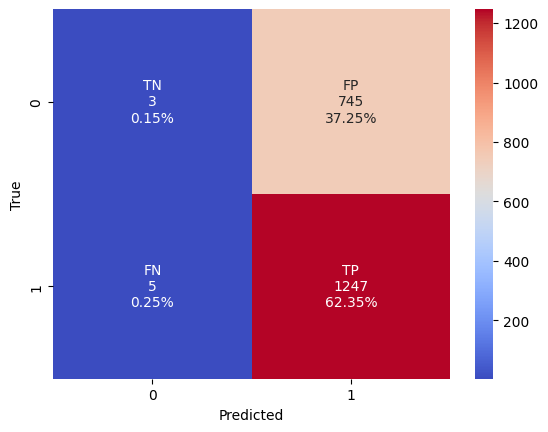

In [139]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_TEST,test_pred))
cf_matrix = confusion_matrix(Y_TEST, test_pred)
cf_matrix

group_names = ['TN','FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## 분류 리포트 (Classifiction Report)

In [140]:
from sklearn.metrics import classification_report

In [141]:
print(classification_report(Y_TEST, test_pred))

              precision    recall  f1-score   support

           0       0.38      0.00      0.01       748
           1       0.63      1.00      0.77      1252

    accuracy                           0.62      2000
   macro avg       0.50      0.50      0.39      2000
weighted avg       0.53      0.62      0.48      2000



## 중요 변수 확인

In [155]:
# model = xgb.XGBClassifier(learning=0.3, max_depth=5,
#                           n_estimators=1000, subsample=0.5, random_state=23)
model = xgb.XGBClassifier(learning=0.3, max_depth=1,
                          n_estimators=208, subsample=0.7, random_state=12)
model.fit(X_TRAIN, Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learning" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning=0.3, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=208, n_jobs=None,
              num_parallel_tree=None, ...)

In [158]:
# 중요 변수
# xgboost -> feature_importances_
model.feature_importances_

array([0.07080956, 0.06498689, 0.06341685, 0.22234876, 0.0704585 ,
       0.06308514, 0.06738438, 0.04965068, 0.05120001, 0.07496984,
       0.07871776, 0.05448458, 0.06848697], dtype=float32)

In [160]:
feature_imp = pd.DataFrame({
    'features': X_TRAIN.columns,
    'values' : model.feature_importances_,
})

In [161]:
pd.options.display.float_format = '{:.6f}'.format
feature_imp.head()

,features,values
0,subscription_duration,0.070810
1,recent_login_time,0.064987
2,average_login_time,0.063417
3,average_time_per_learning_session,0.222349
4,monthly_active_learning_days,0.070459


In [162]:
feature_imp.sort_values(by='values', ascending=False)

,features,values
3,average_time_per_learning_session,0.222349
10,subscription_type,0.078718
9,preferred_difficulty_level,0.074970
0,subscription_duration,0.070810
4,monthly_active_learning_days,0.070459
12,payment_pattern,0.068487
6,recent_learning_achievement,0.067384
1,recent_login_time,0.064987
2,average_login_time,0.063417
5,total_completed_courses,0.063085


<Figure size 10000x20000 with 0 Axes>

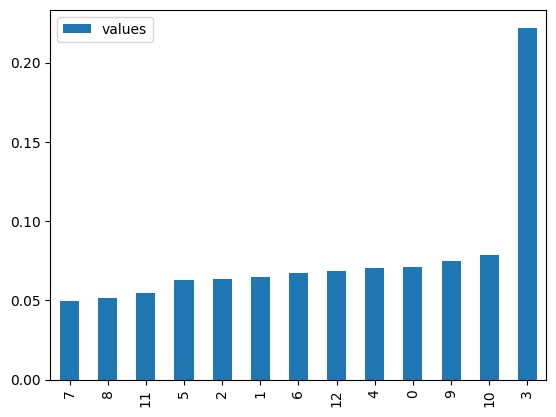

In [163]:
plt.figure(figsize=(100,200))
feature_imp.sort_values(by='values', ascending=True).plot(kind='bar')
plt.show()